In [1]:
import pandas as pd 
import pyodbc 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
conn = pyodbc.connect(
    "DRIVER={SQL Server};"
    "SERVER=localhost\\SQLEXPRESS;"
    "DATABASE=HealthcareAnalytics;"
    "Trusted_Connection=yes;"
)


In [18]:
query=""" SELECT * FROM dbo.HRRP_clean """

In [24]:
df=pd.read_sql(query,conn) 
df.head()

C:\Users\jakka\AppData\Local\Temp\ipykernel_22468\638545554.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


,Facility_Name,Facility_ID,State,Measure_Name,Number_of_Discharges,Number_of_Readmissions,Excess_Readmission_Ratio,Predicted_Readmission_Rate,Expected_Readmission_Rate,Start_Date,End_Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,36.0,0.948,13.015,13.724,2020-07-01,2023-06-30
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,13.0,0.951,9.690,10.190,2020-07-01,2023-06-30
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,151.0,1.060,21.565,20.350,2020-07-01,2023-06-30
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.965,4.268,4.421,2020-07-01,2023-06-30
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,77.0,0.972,16.114,16.586,2020-07-01,2023-06-30


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility_Name               18510 non-null  object 
 1   Facility_ID                 18510 non-null  object 
 2   State                       18510 non-null  object 
 3   Measure_Name                18510 non-null  object 
 4   Number_of_Discharges        8340 non-null   float64
 5   Number_of_Readmissions      8121 non-null   float64
 6   Excess_Readmission_Ratio    11927 non-null  float64
 7   Predicted_Readmission_Rate  11927 non-null  float64
 8   Expected_Readmission_Rate   11927 non-null  float64
 9   Start_Date                  18510 non-null  object 
 10  End_Date                    18510 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.6+ MB


In [28]:
condition_summary = (
    df.groupby("Measure_Name")["Excess_Readmission_Ratio"]
    .mean()
    .round(3)
    .sort_values(ascending=False)
)

condition_summary


Measure_Name
READM-30-HIP-KNEE-HRRP    1.004
READM-30-AMI-HRRP         1.002
READM-30-COPD-HRRP        1.002
READM-30-CABG-HRRP        1.001
READM-30-HF-HRRP          1.001
READM-30-PN-HRRP          1.001
Name: Excess_Readmission_Ratio, dtype: float64

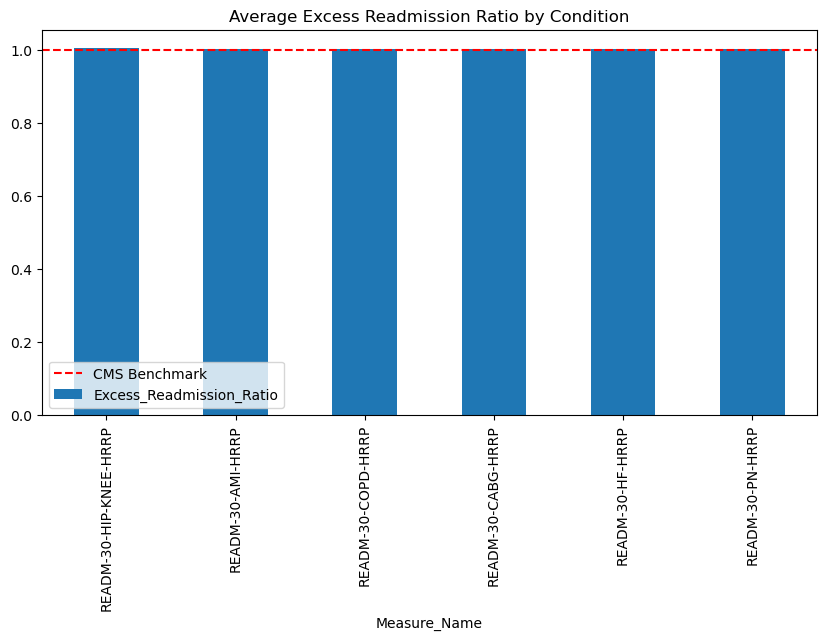

In [30]:
condition_summary.plot(
    kind="bar",
    figsize=(10,5),
    title="Average Excess Readmission Ratio by Condition"
)

plt.axhline(1, color="red", linestyle="--", label="CMS Benchmark")
plt.legend()
plt.show()


In [32]:
state_summary = (
    df.groupby("State")["Excess_Readmission_Ratio"]
    .mean()
    .round(3)
)

state_summary[state_summary > 1].sort_values(ascending=False).head(10)


State
MA    1.041
NJ    1.028
DC    1.020
IL    1.020
NV    1.019
FL    1.019
WV    1.016
VT    1.012
KY    1.011
MS    1.010
Name: Excess_Readmission_Ratio, dtype: float64

In [34]:
condition_summary.to_csv("condition_summary.csv")
state_summary.to_csv("state_summary.csv")
